### 13. Otimização de hiperparâmetros

O último modelo, que classifica imagens Cancer de mama, normais , apresenta uma performance interessante (86%). Efetuar-se-á nesta secção um processo de **otimização de hipermparâmetros**, de modo a aumentar este valor.

Começamos por definir a função que alojará as várias topologias (convolucionais e pooling) e taxa de dropout:

In [ ]:
def setup_model(topo_c, topo_p, dropout_rate, input_size, output_size):
  model = Sequential()
  model.add(Conv2D(topo_c[0], (3, 3), activation='relu', input_shape=(50,50,1)))
  if topo_p[0]==1: model.add(MaxPooling2D((2, 2)))
  if dropout_rate > 0: model.add(Dropout(dropout_rate))
  for i in range(1,len(topo_c)):
    model.add(Conv2D(topo_c[i], (3, 3), activation='relu'))
    if topo_p[i]==1: model.add(MaxPooling2D((2, 2)))
    if dropout_rate > 0: model.add(Dropout(dropout_rate))
  model.add(layers.Flatten())
  if dropout_rate > 0: model.add(Dropout(dropout_rate))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(2, activation='softmax'))
  return model

Na sequência define-se uma função que incorpora os vários algoritmos de treino, a loss e a métrica a usar, o número de epochs e o batch size:

In [ ]:
def train_cnn(model, alg, lr, Xtrain, Ytrain, epochs, batch_size):
  if alg == "adam":
    optimizer = optimizers.Adam(lr = lr)
  elif alg == "rmsprop":
    optimizer = optimizers.RMSprop(lr = lr)
  elif alg == "sgd_momentum":
   optimizer = optimizers.SGD(lr = lr, momentum = 0.9)
  else: optimizer = optimizers.SGD(lr = lr)

  model.compile(optimizer = optimizer, loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
  history=model.fit(Xtrain, Ytrain, epochs = epochs, batch_size = batch_size, verbose = 0,callbacks = callbacks)
  return model,history

A última função vai treinando os vários modelos, guardando configuração com a melhor performance:

In [ ]:
def cnn_optimization(opt_params, Xtrain, Ytrain, Xval, Yval, iterations, verbose = True):
  #verbose: producing detailed logging information
  from random import choice
  if verbose: print("Topology\tDropout\tAlgorithm\tLRate\tBatchSize\tEpochs\tValLoss\tValAcc\n")
  best_acc = None
  input_size = Xtrain.shape[0]
  output_size = Ytrain.shape[0]

  if "topology_c" in opt_params: topologies_c = opt_params["topology_c"]
  else: topologies_c = [[64,64,64]]
  if "topology_p" in opt_params: topologies_p = opt_params["topology_p"]
  else: topologies_p = [[1,1,1]]
  if "algorithm" in opt_params: algs = opt_params["algorithm"]
  else: algs = ["adam"]
  if "lr" in opt_params: lrs = opt_params["lr"]
  else: lrs = [0.001]
  if "dropout" in opt_params: dropouts = opt_params["dropout"]
  else: dropouts= [0.0]
  if "batch_size" in opt_params: batch_sizes = opt_params["batch_size"]
  else: batch_sizes= [512]
  if "epochs" in opt_params: epoch = opt_params["epochs"]
  else: epoch= [5]

  for it in range(iterations):
    #print('Iteração', it+1, 'de', iterations)
    #random item from the list
    topo_c = choice(topologies_c)
    topo_p = choice(topologies_p)   
    dropout_rate = choice(dropouts)
    dnn = setup_model (topo_c,topo_p, dropout_rate, input_size, output_size)
    alg = choice(algs)
    lr = choice(lrs)
    bs=choice(batch_sizes)
    epo=choice(epoch)

    dnn, history = train_cnn(dnn, alg, lr, Xtrain, Ytrain, epo, bs)
    val_loss, val_acc = dnn.evaluate(Xval, Yval, verbose = 0)
    if verbose:
      print(topo_c, "\t", topo_p, "\t", dropout_rate, "\t", alg, "\t", lr, "\t", bs, "\t", epo, "\t", val_loss, "\t", val_acc)
    if best_acc is None or val_acc > best_acc:
      best_acc = val_acc
      best_config = (topo_c, topo_p, dropout_rate, alg, lr, bs, epo)
      best_model=dnn
      best_history=history
    return best_config, best_acc,best_model,best_history

In [ ]:
def cnn_optimization(opt_params, Xtrain, Ytrain, Xval, Yval, iterations, verbose = True):
  #verbose: producing detailed logging information
  from random import choice
  if verbose: print("Topology\tDropout\tAlgorithm\tLRate\tBatchSize\tEpochs\tValLoss\tValAcc\n")
  best_acc = None
  input_size = Xtrain.shape[0]
  output_size = Ytrain.shape[0]

  if "topology_c" in opt_params: topologies_c = opt_params["topology_c"]
  else: topologies_c = [[64,64,64]]
  if "topology_p" in opt_params: topologies_p = opt_params["topology_p"]
  else: topologies_p = [[1,1,1]]
  if "algorithm" in opt_params: algs = opt_params["algorithm"]
  else: algs = ["adam"]
  if "lr" in opt_params: lrs = opt_params["lr"]
  else: lrs = [0.001]
  if "dropout" in opt_params: dropouts = opt_params["dropout"]
  else: dropouts= [0.0]
  if "batch_size" in opt_params: batch_sizes = opt_params["batch_size"]
  else: batch_sizes= [512]
  if "epochs" in opt_params: epoch = opt_params["epochs"]
  else: epoch= [5]

  for it in range(iterations):
    #print('Iteração', it+1, 'de', iterations)
    #random item from the list
    topo_c = choice(topologies_c)
    topo_p = choice(topologies_p)   
    dropout_rate = choice(dropouts)
    dnn = setup_model (topo_c,topo_p, dropout_rate, input_size, output_size)
    alg = choice(algs)
    lr = choice(lrs)
    bs=choice(batch_sizes)
    epo=choice(epoch)

    dnn, history = train_cnn(dnn, alg, lr, Xtrain, Ytrain, epo, bs)
    val_loss, val_acc = dnn.evaluate(Xval, Yval, verbose = 0)
    #if verbose:
    print(topo_c, "\t", topo_p, "\t", dropout_rate, "\t", alg, "\t", lr, "\t", bs, "\t", epo, "\t", val_loss, "\t", val_acc)
    #config = (topo_c, topo_p, dropout_rate, alg, lr, bs, epo, val_loss, val_acc)
    if best_acc is None or val_acc > best_acc:
      best_acc = val_acc
      best_config = (topo_c, topo_p, dropout_rate, alg, lr, bs, epo)

      best_model=dnn
      best_history=history
  print("\t")
  print("BestTopology\tBestDropout\tBestAlgorithm\tBestLRate\tBestBatchSize\tBestEpochs\tBestValLoss\tBestValAcc\n")
  print(best_config, "\t", best_acc)
  return best_config, best_acc,best_model,best_history

Listam-se os hiperparâmetros a otimizar:

In [ ]:
#, [64,64,64,128,128]
opt_pars = {
     "topology_c":[[64,64,64], [32,64,128]],
     "topology_p":[[1,1,1,1,1], [1,0,1,0,1]],#pooling constante ou intercalado
     "algorithm": ["adam","RMSprop"],
     "lr": [0.001, 0.0001], 
     "dropout": [0, 0.2],
     "batch_size":  [32,64,128],
     "epochs":[10]}

E inicia-se o treino dos modelos e a seleção do mais preditivo:

In [ ]:
best_config, best_val_acc,best_model,best_history=cnn_optimization(opt_pars, X_train, y_train, X_val, y_val, 10,verbose = True)

Topology	Dropout	Algorithm	LRate	BatchSize	Epochs	ValLoss	ValAcc



/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


[32, 64, 128] 	 [1, 1, 1, 1, 1] 	 0 	 adam 	 0.0001 	 32 	 10 	 0.44058847430928777 	 0.8023363947868347
[64, 64, 64] 	 [1, 1, 1, 1, 1] 	 0 	 adam 	 0.0001 	 64 	 10 	 0.4371078145569144 	 0.802026629447937
[64, 64, 64] 	 [1, 0, 1, 0, 1] 	 0 	 adam 	 0.0001 	 64 	 10 	 0.43063096260978584 	 0.8061418533325195
[32, 64, 128] 	 [1, 0, 1, 0, 1] 	 0 	 adam 	 0.001 	 32 	 10 	 0.4692700799930264 	 0.7918491959571838
[64, 64, 64] 	 [1, 1, 1, 1, 1] 	 0 	 adam 	 0.001 	 64 	 10 	 0.43253423811809233 	 0.8094605803489685
[64, 64, 64] 	 [1, 1, 1, 1, 1] 	 0 	 adam 	 0.0001 	 64 	 10 	 0.4421732169866319 	 0.8012744188308716
[32, 64, 128] 	 [1, 0, 1, 0, 1] 	 0.2 	 RMSprop 	 0.001 	 128 	 10 	 0.5565816923429324 	 0.7329527735710144
[32, 64, 128] 	 [1, 1, 1, 1, 1] 	 0 	 RMSprop 	 0.001 	 32 	 10 	 0.5070461611356549 	 0.7409177422523499
[64, 64, 64] 	 [1, 1, 1, 1, 1] 	 0 	 RMSprop 	 0.001 	 64 	 10 	 0.5131186235530739 	 0.7365812659263611
[32, 64, 128] 	 [1, 1, 1, 1, 1] 	 0 	 adam 	 0.0001 	 128 	 

In [ ]:
print("BestTopology\tBestDropout\tBestAlgorithm\tBestLRate\tBestBatchSize\tBestEpochs\tBestValLoss\tBestValAcc\n")
print("Best configuration:", best_config)
print("Best validation accuracy:", best_val_acc)
best_model = setup_model(best_config[0], best_config[1],best_config[2], X_train.shape[0],y_train.shape[0])
best_model, best_history = train_cnn(best_model, best_config[3], best_config[4], X_train,y_train,best_config[5],50)
test_loo, test_acc = best_model.evaluate(X_test, y_test, verbose = 0)
print("Test set metrics:", test_loo, test_acc)

BestTopology	BestDropout	BestAlgorithm	BestLRate	BestBatchSize	BestEpochs	BestValLoss	BestValAcc

Best configuration: ([64, 64, 64], [1, 1, 1, 1, 1], 0, 'adam', 0.001, 64, 10)
Best validation accuracy: 0.8094605803489685


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Test set metrics: 1.7671839452974416 0.7554826140403748


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 22, 22, 64)        36928     
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 1024)            

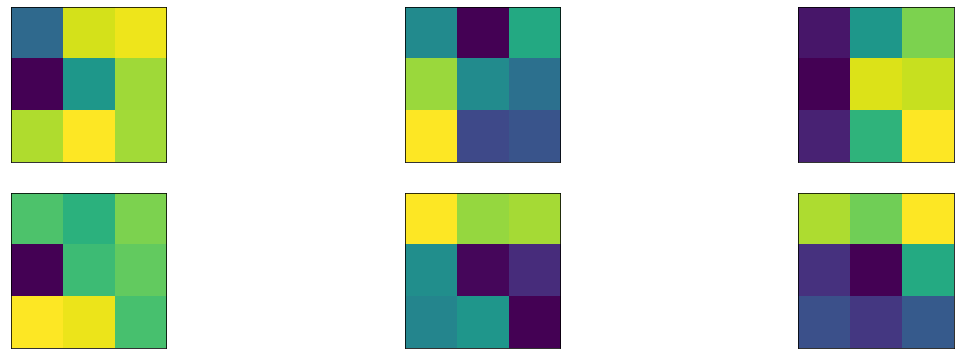

Train on 52729 samples, validate on 22599 samples
Epoch 1/50
52729/52729 [==============================] - 12s 231us/step - loss: 0.1401 - accuracy: 0.9490 - val_loss: 1.6370 - val_accuracy: 0.7500
Epoch 2/50
52729/52729 [==============================] - 12s 231us/step - loss: 0.1179 - accuracy: 0.9569 - val_loss: 1.6388 - val_accuracy: 0.7607
Epoch 3/50
52729/52729 [==============================] - 12s 231us/step - loss: 0.1096 - accuracy: 0.9584 - val_loss: 1.5653 - val_accuracy: 0.7375
Epoch 4/50
52729/52729 [==============================] - 12s 230us/step - loss: 0.1103 - accuracy: 0.9588 - val_loss: 1.5980 - val_accuracy: 0.7519
Epoch 5/50
52729/52729 [==============================] - 12s 231us/step - loss: 0.1130 - accuracy: 0.9590 - val_loss: 1.5599 - val_accuracy: 0.7520
Epoch 6/50
52729/52729 [==============================] - 12s 229us/step - loss: 0.1082 - accuracy: 0.9586 - val_loss: 1.6146 - val_accuracy: 0.7342
Epoch 7/50
52729/52729 [==============================] 

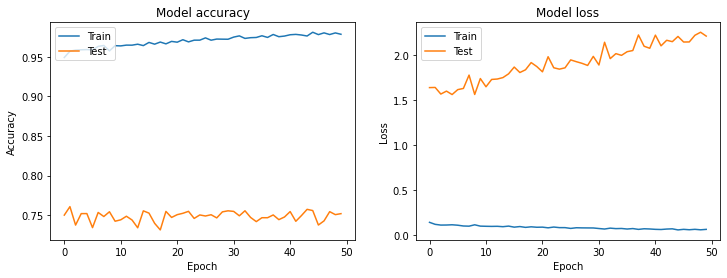

In [ ]:
best_model.summary()
camadas(best_model)
historybest=best_model.fit(X_train, y_train, epochs=50,validation_data=(X_val,y_val))
output_metrics(best_model,historybest,X_test, y_test)


In [ ]:
model_save_name = 'best_model.sav'
path = F"/content/{model_save_name}" 
torch.save(best_model, path)
tf.keras.utils.plot_model(best_model, "best_model.png", show_shapes = True)

history_pickle.append(historybest)
with open('history.pickle', 'wb') as f:
    pickle.dump([history_pickle], f)

O modelo dinal, avaliado no conjunto de validação, apresenta uma performance global de 75.19%, identificando dos casos Cancer de mama mas no caso de training chega a 97.83%.



Destaque para a visualização dos casos deCancer marcados como normais:

Normal marcado como Cancer:


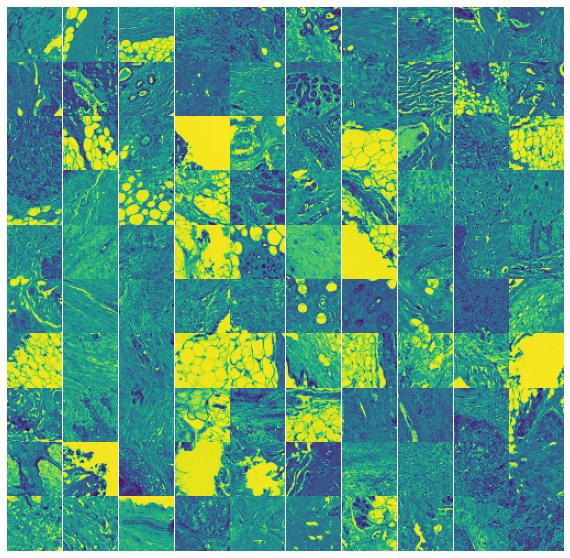

In [ ]:

y_pred_3class2=np.argmax(best_model.predict(X_test),axis=1)

index2=[]
for i in range(0,len(y_test),1):
  if ((y_test[i] ==0) & (y_pred_3class2[i]==1)):#erro Cancer-> normal
    index2.append(i)

plt.subplots_adjust(wspace=0, hspace=0)
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
print('Normal marcado como Cancer:')
for l in index2[:100]:
    #print(i_)    
    plt.subplot(10, 10, i_+1) #.set_title(l)
    i_ += 1
    im = X_test[l]
    im = im[:,:,0]
    plt.imshow(im)
    plt.axis('off')

Cancer marcado como normal:


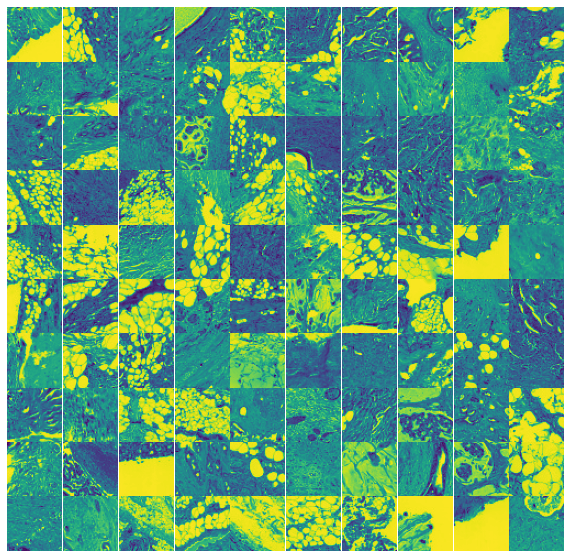

In [ ]:
y_pred_3class2=np.argmax(best_model.predict(X_test),axis=1)

index2=[]
for i in range(0,len(y_test),1):
  if ((y_test[i] ==1) & (y_pred_3class2[i]==0)):#erro Cancer-> normal
    index2.append(i)

plt.subplots_adjust(wspace=0, hspace=0)
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
print('Cancer marcado como normal:')
for l in index2[:100]:
    #print(i_)    
    plt.subplot(10, 10, i_+1) #.set_title(l)
    i_ += 1
    im = X_test[l]
    im = im[:,:,0]
    plt.imshow(im)
    plt.axis('off')

Das hipóteses testadas, identifica-se como mais preditivo um modelo com:
* 3 camadas convolucionais de 32, 64 e 128 filtros, seguida de uma camada de pooling após a primeira camada convolucional e após a última
* ausência de dropout
* algoritmo de treino: Adam
* velocidade de aprendizagem: 0.001

Para os parâmetros ótimos de algoritmo, batch-size e learning-rate selecionados, testam-se algumas topologias adicionais:
BestTopology	BestDropout	BestAlgorithm	BestLRate	BestBatchSize	BestEpochs	BestValLoss	BestValAcc

Best configuration: ([32, 64, 128], [1, 0, 1, 0, 1], 0, 'adam', 0.001, 128, 10)

Nesta otimização, variou o número de camadas convolucionais: de 64+64+64 para 32+64+128.

Treina-se de seguida a melhor configuração identificada para o modelo num conjunto de dados que engloba os dados de treino e validação.

O modelo dinal, avaliado no conjunto de teste, apresenta uma **performance global de 75.19%**, identificando **75.19% dos casos Cancer de mama**.



Não se identifica nas imagens motivo, à priori, para a dificuldade na classificação. Eventualmente poder-se-ia avaliar clinicamente a label atribuída a estes casos.

Para os novos dados (labels), são redefinidas os conjuntos de treino, validação e teste: